In [6]:
# cwd(~/Projects/ASTRAL/soundings/src/")
using Pkg; Pkg.activate("../ASTRAL_soundings")

using Revise
#using Regex
using CSV, DataFrames
using Dates
using PyPlot

  Activating project at `~/Projects/ASTRAL/soundings/ASTRAL_soundings`


In [7]:
reldatapath = "../data/EKAMSAT_IMD/ekamsat"
stations = ["Chennai","Karaikal","Kochi","Kolkata","Mangalore","PortBlair","Visakhapatnam"]
hdr = [4,4,4,4,4,4,7] # 7 header lines for Vsk, 4 for others

stationdir = lowercase(stations[7])

# read standard named files in the station's directory
files = filter(x -> occursin(r"(?i)(May|Standard).*(\.txt)$(?-i)",x),
               readdir(joinpath(reldatapath, stationdir)) ) 

32-element Vector{String}:
 "01MAY2023VSK.txt"
 "02MAY2023VSK.txt"
 "03MAY2023VSK.txt"
 "04MAY2023VSK.txt"
 "05MAY2023VSK.txt"
 "06MAY2023VSK.txt"
 "07MAY2023VSK.txt"
 "08MAY2023VSK.txt"
 "09MAY2023VSK.txt"
 "10MAY2023VSK.txt"
 "43150-20230501-00-Standard-Summary.txt"
 "43150-20230502-00-Standard-Summary.txt"
 "43150-20230503-00-Standard-Summary.txt"
 ⋮
 "43150-20230511-00-Standard-Summary.txt"
 "43150-20230512-00-Standard-Summary.txt"
 "43150-20230513-00-Standard-Summary.txt"
 "43150-20230514-00-Standard-Summary.txt"
 "43150-20230515-00-Standard-Summary.txt"
 "43150-20230516-00-Standard-Summary.txt"
 "43150-20230517-00-Standard-Summary.txt"
 "43150-20230518-00-Standard-Summary.txt"
 "43150-20230519-00-Standard-Summary.txt"
 "43150-20230520-00-Standard-Summary.txt"
 "43150-20230521-00-Standard-Summary.txt"
 "43150-20230522-00-Standard-Summary.txt"

In [ ]:
# dates are formatted a variety of different ways
datematcher = ["yyyymmdd-HH", "ddUyyyy", "dduuuyy"]
ldm = length.(datematcher)
datefm = Dates.DateFormat.(datematcher)
# doesn't handle undelimited month names

"Parse the various date formats in the file names. Only works for May or 3-letter month."
function imd_file_date(fn)
    if fn[1:6]=="43150-" && all(isnumeric, fn[[7:14; 16:17]]) # 43150 Visakhap. WMO station ID
        dt = Dates.DateTime(fn[7:17], "yyyymmdd-HH")
    elseif fn[10:12]=="VSK" && all(isnumeric, fn[[1:2; 6:9]])  # Visakhap.
        dt = Dates.DateTime(fn[1:9], "ddUUUyyyy")
    elseif all(isnumeric, fn[[1:8; 10:11]])
        dt = Dates.DateTime(fn[1:11], "yyyymmdd-HH")
    else
        if all(isnumeric, fn[[1:2; 6:7]])
            if isletter(fn[8])
                dt = DateTime( 2000+year(DateTime(fn[6:7], "yy")),
                    month(DateTime(fn[3:5], "U")),
                    day(DateTime(fn[1:2], "d")) )
            elseif all(isnumeric, fn[8:9])
                dt = DateTime( year(DateTime(fn[6:7], "yyyy")),
                    month(DateTime(fn[3:5], "U")),
                    day(DateTime(fn[1:2], "d")) )
            end
        end
    end
    return dt
end

In [16]:
fdt = imd_file_date.(files)
ord = sortperm(fdt)
fdt12 = round.(fdt[ord], Dates.Hour(12))

findfirst.(isequal.(unique.(fdt12)), fdt12)

LoadError: MethodError: no method matching iterate(::DateTime)
[0mClosest candidates are:
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m) at range.jl:872
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m, [91m::Integer[39m) at range.jl:872
[0m  iterate([91m::T[39m) where T<:Union{Base.KeySet{<:Any, <:Dict}, Base.ValueIterator{<:Dict}} at dict.jl:712
[0m  ...

In [127]:
reldatapath = "../data/EKAMSAT_IMD/ekamsat"
for station in ["Chennai","Karaikal","Kochi","Kolkata","Mangalore","PortBlair","Visakhapatnam"]
    # read standard named files in the station's directory
    files = filter(x -> occursin(r"(?i)(May|Standard).*(\.txt)$(?-i)",x),
                   readdir(joinpath(reldatapath, lowercase(station))) )
    dts = imd_file_date.(files)
end

In [146]:
station = lowercase("visakhapatnam")

files = filter(x -> occursin(r"(?i)(May|Standard).*(\.txt)$(?-i)",x),
               readdir(joinpath(reldatapath, station) ))
dt = imd_file_date(files[8])

striptabs(f) = IOBuffer(replace(read(f), UInt8('\t') => UInt8(' ')))
df = CSV.read(striptabs(joinpath(reldatapath, station, files[8])), DataFrame, header=7)

┌ Warning: thread = 1 warning: parsed expected 11 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/7lFhM/src/file.jl:577


Row,Time,P(hPa),T(C),U(%),Dew(C),Geo(gpm),Geo(gpft),Wdir(d),Wspd(m/s),Asc(m/m),AvgAsc(m/m),Column12
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,000:00.00,999.1,29.0,89.0,27.0,60.0,196.9,240.0,1.0,0.0,0.0,missing
2,000:01.00,998.9,28.6,87.4,26.3,60.9,199.9,240.4,1.0,64.0,55.6,missing
3,000:02.00,998.5,28.5,87.3,26.2,64.1,210.3,240.9,1.1,189.4,121.9,missing
4,000:03.00,998.1,28.5,87.3,26.2,68.3,224.1,241.3,1.1,197.2,165.9,missing
5,000:04.00,997.5,28.4,87.3,26.1,73.3,240.5,241.6,1.1,226.3,199.2,missing
6,000:05.00,997.0,28.4,87.3,26.1,78.2,256.6,242.0,1.2,242.4,218.1,missing
7,000:06.00,996.4,28.4,87.4,26.0,82.8,271.7,242.3,1.2,242.9,227.8,missing
8,000:07.00,996.0,28.3,87.4,26.0,87.2,286.0,242.7,1.2,244.9,232.6,missing
9,000:08.00,995.5,28.3,87.4,26.0,91.3,299.7,243.0,1.2,246.0,234.8,missing


In [158]:
p = df[!,3][:]
T = df[!,2][:]
rh = df[!,4][:]
Td = df[!,5][:]
z = df[!,6][:]
wspd = df[!,8]
wdir = df[!,7]
u = wspd .* sind.(wdir)
v = wspd .* cosd.(wdir)

5155-element Vector{Float64}:
 -229.63526017382577
 -226.0452657333047
 -207.99198814117128
 -173.2838756502575
 -118.96953212099766
  -56.08299264558598
    7.188130941822289
   66.89718625678569
  120.39645642907499
  166.17218175917043
  202.81632211290918
  229.33627417784123
  243.19158129852372
    ⋮
   -1.9892713120425551
   13.567699926025142
   28.530996936960317
   41.64858941188765
   52.201736492120745
   58.57859992603955
   59.92285114170417
   56.09462320129064
   48.62082723601881
   39.71279279326854
   31.963140264180108
   27.928683343283453

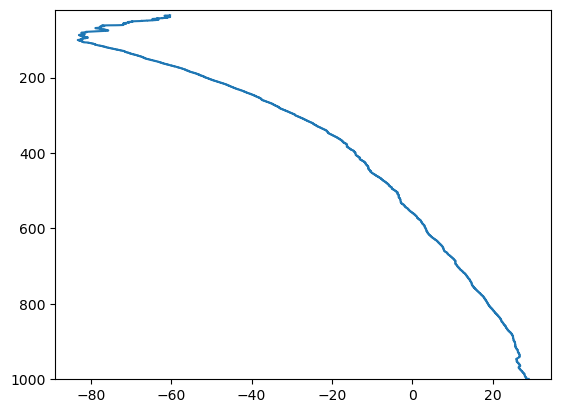

(1000.0, 20.0)

In [156]:
plot( p, T, label="Temperature (C)")
ylim(1000, 20)